# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, decomposition
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.cluster import DBSCAN
set_config(display='diagram')


import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
model = KMeans(n_clusters = 8) 
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels)

0.5549795485278285

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
model = KMeans(n_clusters = 5) 
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
model = KMeans(n_clusters = 3) 
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

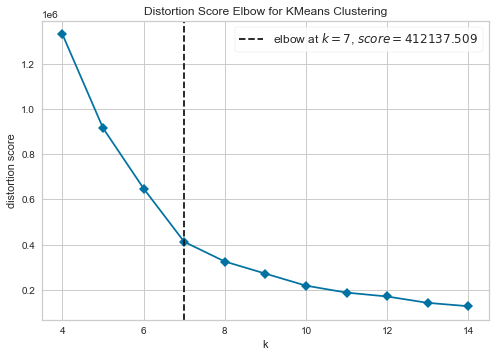

In [6]:
# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), metric="distortion", timings=False)
visualizer.fit(X)
visualizer.show();

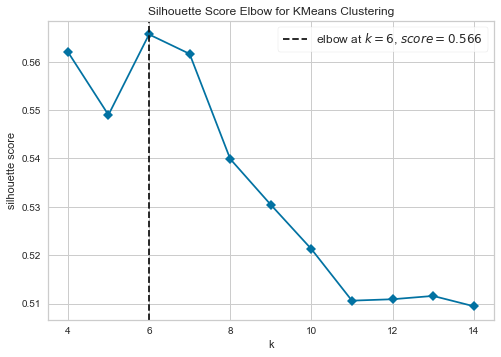

In [7]:
# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), metric="silhouette", timings=False)
visualizer.fit(X)
visualizer.show();

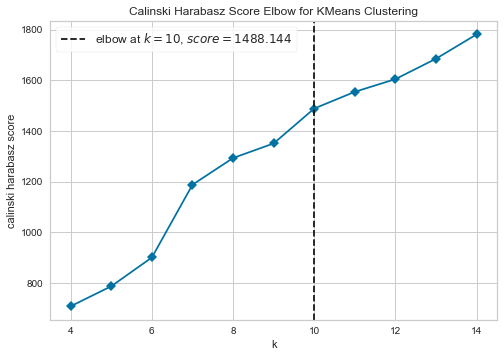

In [8]:
# visualization with n_clusters = 3 (best number of clusters we found) 
visualizer = KElbowVisualizer(model, k=(4,15), metric="calinski_harabasz", timings=False)
visualizer.fit(X)
visualizer.show();

````
Según las métricas distorsión y silhouette, el número de clusters óptimo son 7 y 6 respectivamente. De acuerdo a la métrica calinski_harabasz, el número óptimo es 10.
````

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

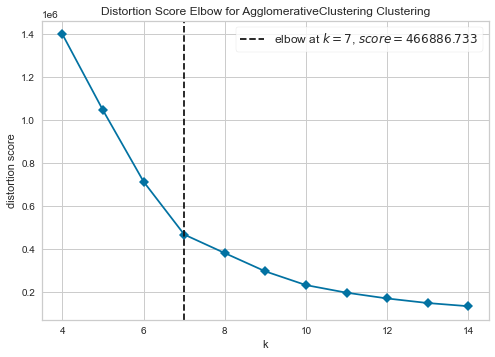

In [9]:
model = AgglomerativeClustering()

# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), timings=False)
visualizer.fit(X)
visualizer.show();

````
Obtenemos el mismo resultado que con K-Means con la métrica distorsion (por defecto).
````

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [10]:
model = KMeans(n_clusters=3) 
labels = model.fit_predict(X) 
X["labels"] = labels

import seaborn as sns

clustering = AgglomerativeClustering(n_clusters=4).fit(X)
X['labels']= clustering.labels_
sns.set(style="ticks")
sns.pairplot(X, hue="labels")
plt.show()

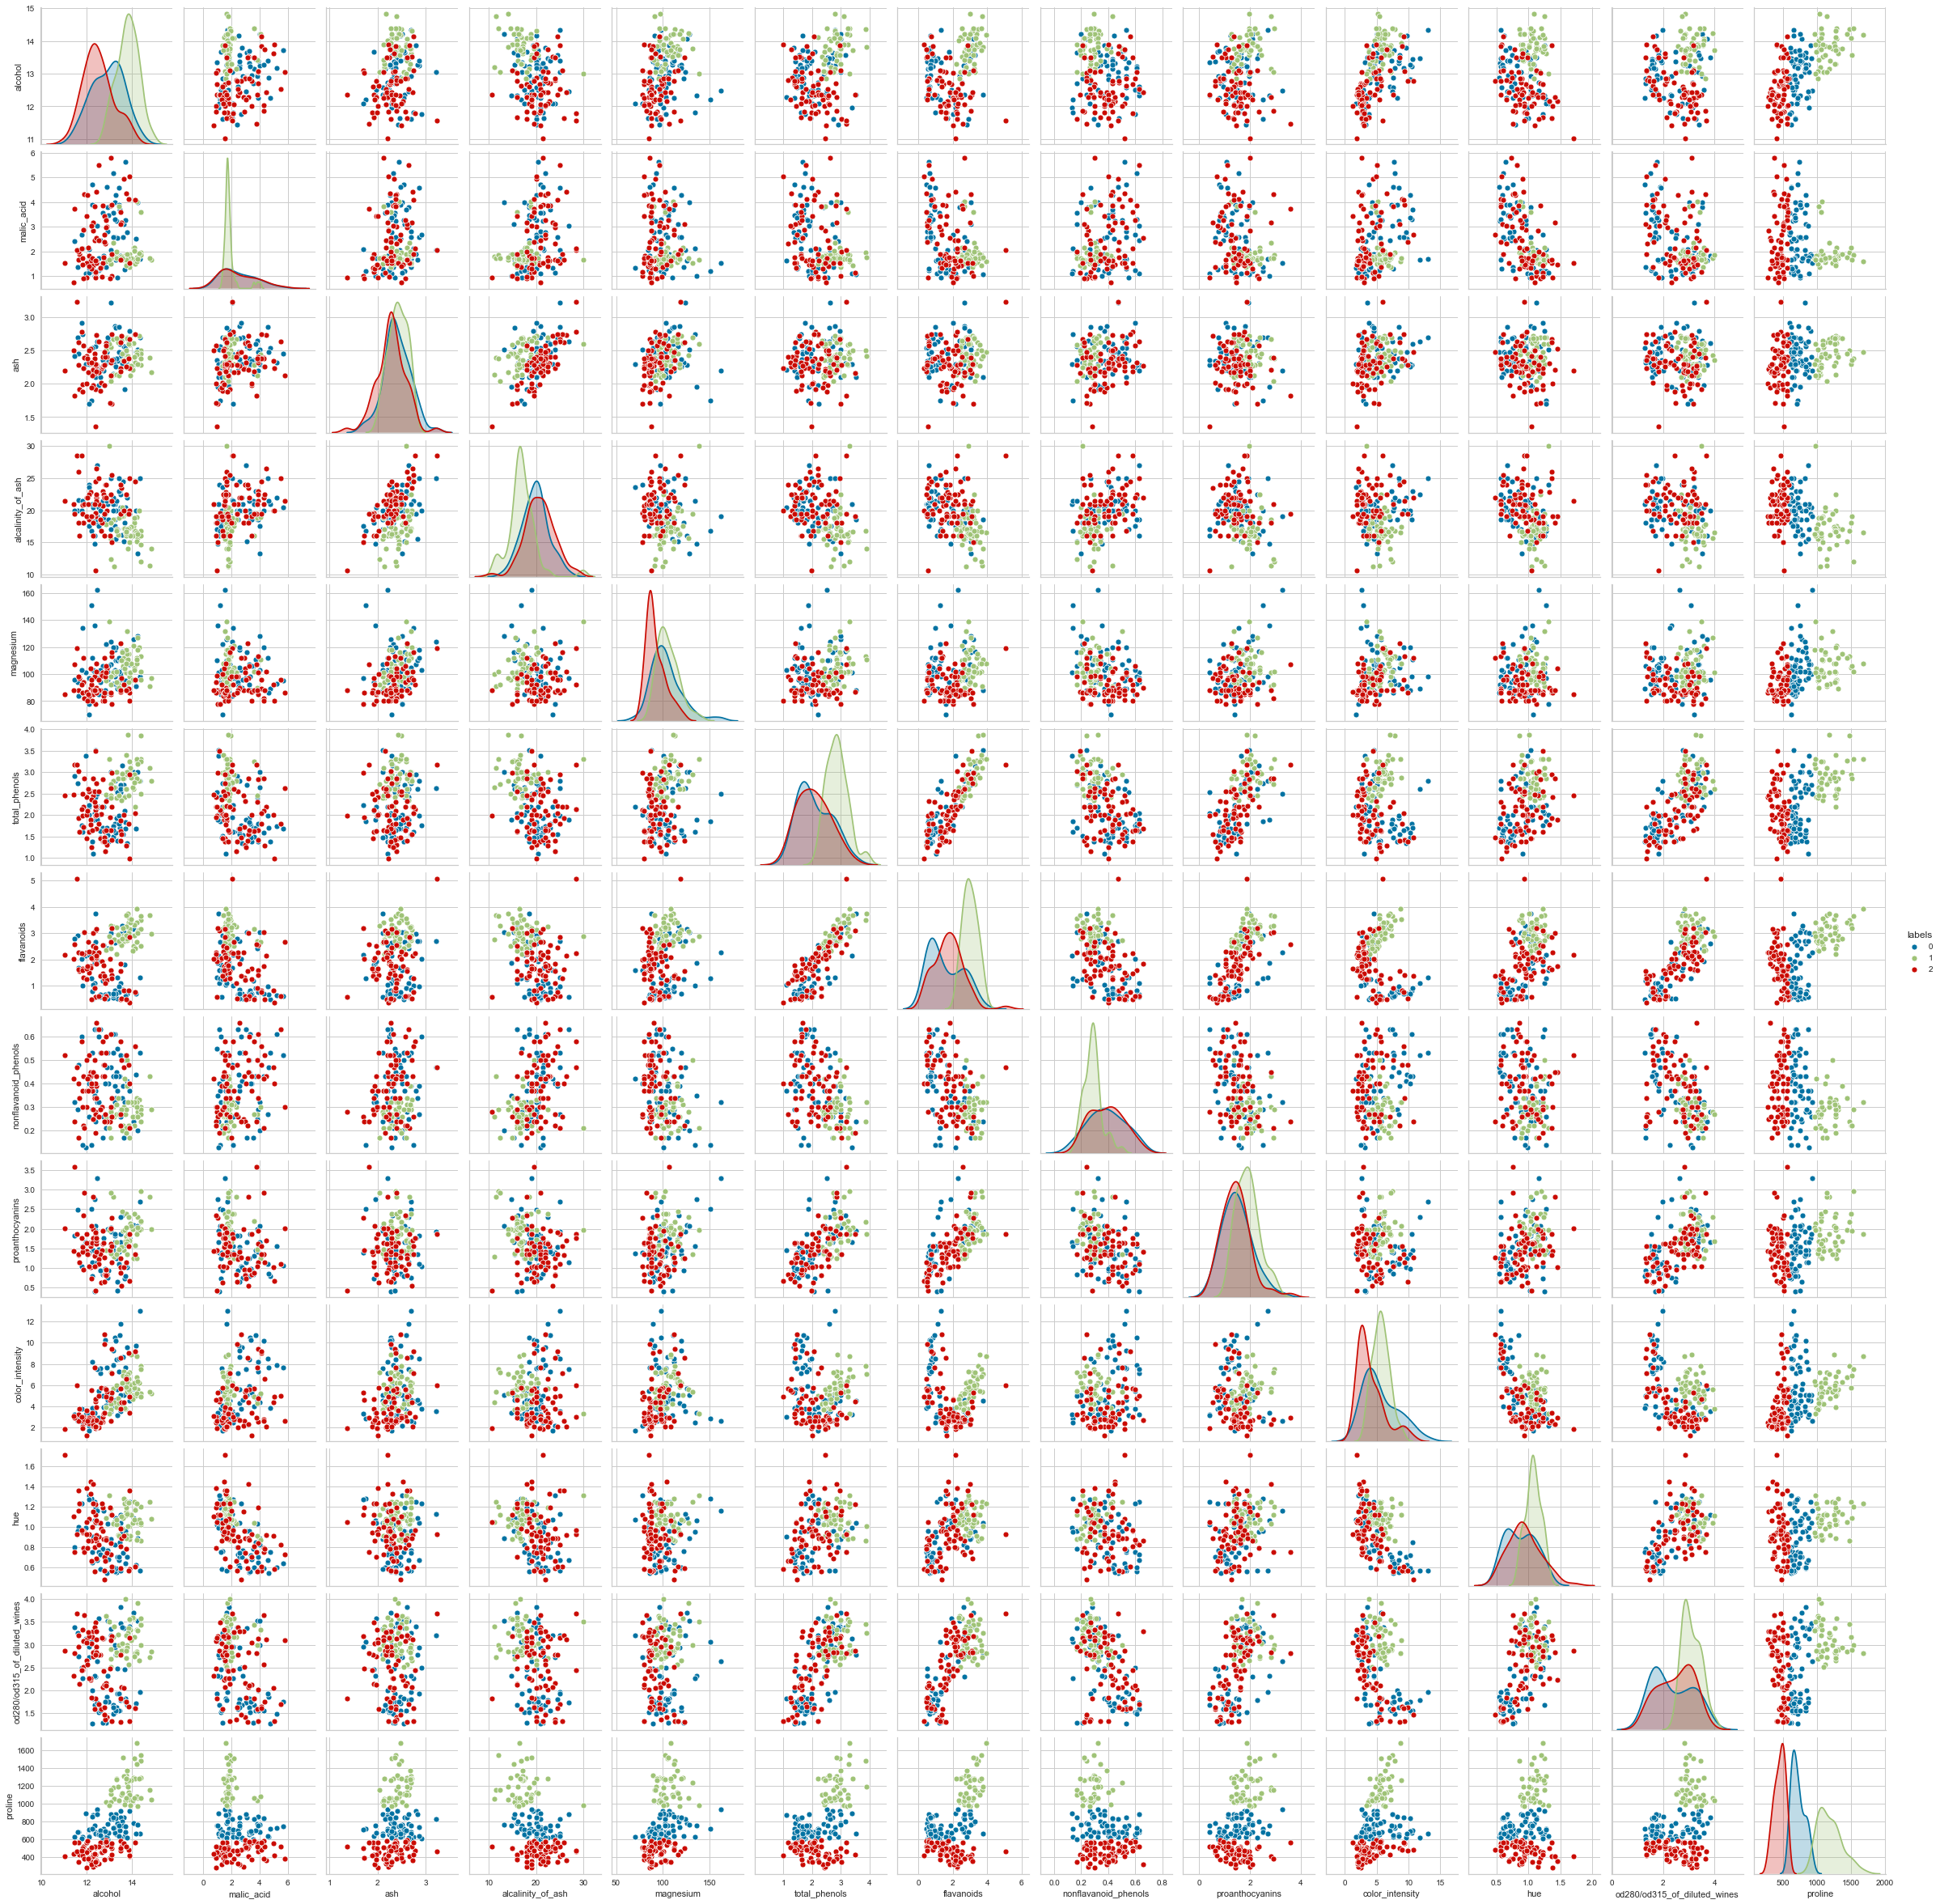

In [11]:
sns.pairplot(X, hue="labels")

````
Como se puede observar, las distribuciones se solapan bastante y, salvo en casos contados, los clusters no agrupan con suficiente precisión.
````

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [25]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X.drop(['labels'], axis =1))



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [ ]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['species'] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='species', s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

#ValueError: zero-size array to reduction operation minimum which has no identity



In [ ]:
sns.scatterplot(x = df["pca1"], y = df["pca2"], hue = df["labels"], legend = "full")

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [ ]:
X1=X.drop('labels',axis=1)
for p in range(30,50):
    tsne = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
    tsne_results = tsne.fit_transform(principalComponents)
    df=pd.DataFrame(tsne_results)
    df['labels']=X['labels']
    plt.figure()
    ax = sns.scatterplot(x=0, y=1, hue="labels", data=df[[0,1,'labels']])
    plt.show()
    
    

#ValueError: zero-size array to reduction operation minimum which has no identity


